# Unsupervised Learning: Clustering Lab





In [67]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import AgglomerativeClustering, KMeans
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.spatial.distance import cdist
import sys

## 1. (50%) Implement the k-means clustering algorithm and the HAC (Hierarchical Agglomerative Clustering) algorithm.

### 1.1.1 HAC

### Code requirements 
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from n to 1.  To simplify the amount of output you may want to implement a mechanism to specify for which k values actual output will be generated.


---
The output should include the following:
- The number of clusters (k).
- The total SSE of the full clustering. 


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
* The SSE of that cluster. (The sum squared error (SSE) of a single cluster is the sum of the squared euclidean distance of each cluster member to the cluster centroid.)
---
You only need to handle continuous features

In [68]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        self.dic={}
        
    def fit(self,X,y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        # Initial distance
        self.data=X
        initial_distances = cdist(X, X)
        
        np.fill_diagonal(initial_distances, sys.maxsize)
        clusters = self.get_cluster(initial_distances, self.link_type) 

        # K clusters
        self.clusters_arr = clusters[len(X) - self.k]
        self.arr, self.counts = np.unique(self.clusters_arr, return_counts=True)
        return self
    
    
    def get_cluster(self, distances, link_type):
        
        clusters = {}
        array = []
        clusters[0] = array.copy()
        
        for n in range(distances.shape[0]):
            array.append(n)

        row = -1
        col = -1
        for k in range(1, distances.shape[0]):
            a = divmod(distances.argmin(), distances.shape[1])
            row, col = a[1], a[0]
            
            #single
            if link_type == "single":
                for i in range(0,distances.shape[0]):
                    if(i != col):
                        temp = min(distances[col][i],distances[row][i])
                        distances[col][i] = temp
                        distances[i][col] = temp
            #complete     
            elif link_type == "complete":
                for i in range(0,distances.shape[0]):
                    if(i != col and i!=row):
                        temp = max(distances[col][i],distances[row][i])
                        distances[col][i] = temp
                        distances[i][col] = temp

            for i in range (0,distances.shape[0]):
                distances[row][i] = sys.maxsize
                distances[i][row] = sys.maxsize

            minimum, maximum = min(row,col), max(row,col)
            for j in range(len(array)):
                if array[j]==maximum:
                    array[j] = minimum
            clusters[k] = array.copy()
        return clusters
    
    def get_data_array(self, arr):
        indices = np.where(self.clusters_arr == arr)
        return self.data[indices]
    
    def get_centroid(self, arr):
        d = self.get_data_array(arr)
        return np.mean(d, axis=0)
    
    def get_sse(self, centroid, data_arr):
        temp = centroid - data_arr
        temp = temp**2
        return np.sum(temp)
    
    def get_total_sse(self):
        s = 0
        for a,c in zip(self.arr, self.counts):
            cen, data = self.get_centroid(a), self.get_data_array(a)
            s += self.get_sse(cen, data)
        return s
        
    def print_clusters(self):
        """
            Used for grading.
            print("{:d}\n".format(k))
            print("{:.4f}\n\n".format(total SSE))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("\n")
                print("{:d}\n".format(size of cluster))
                print("{:.4f}\n\n".format(SSE of cluster))
        """
        self.total_sse = self.get_total_sse()
        print("{:d}".format(self.k))
        print("{:.4f}\n".format(self.total_sse))
        
        for arr, cluster in zip(self.arr, self.counts):
            centroid, data_arr = self.get_centroid(arr), self.get_data_array(arr)
            print(np.array2string(centroid, precision=4, separator=","))
            print("{:d}".format(len(data_arr)))
            print("{:.4f}\n".format(self.get_sse(centroid, data_arr)))
        
        

### 1.1.2 Debug 

Debug your model by running it on the [Debug Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)


---
The dataset was modified to be a lot smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points should be commented out.



- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting SSE and centroid values.


---
Solutions in files:

[Debug HAC Single.txt](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/Debug%20HAC%20Single%20Link.txt)

[Debug HAC Complete.txt](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/Debug%20HAC%20Complete%20Link.txt)

In [70]:
# Debug Here
from scipy.io import arff
import pandas as pd

abalone = arff.loadarff("abalone.arff")
abalone_df = pd.DataFrame(abalone[0])
abalone_df = (abalone_df - abalone_df.min()) / (abalone_df.max() - abalone_df.min())
abalone_np = np.array(abalone_df)

hac_debug = HACClustering(k=5)
hac_debug.fit(abalone_np)
print("<SINGLE LINK>")
hac_debug.print_clusters()

<SINGLE LINK>
5
54.4392

[0.599 ,0.5923,0.4915,0.2826,0.2682,0.2921,0.2316,0.3849]
195
54.3917

[0.9189,0.9438,0.7105,0.7016,0.759 ,0.7222,0.4472,0.8824]
1
0.0000

[1.    ,0.9831,0.8026,0.8343,0.6575,0.7825,0.9221,0.8824]
2
0.0475

[1.    ,0.9888,0.7895,1.    ,1.    ,0.8915,0.7186,0.5882]
1
0.0000

[0.9189,0.9888,0.8684,0.719 ,0.5797,0.7512,0.6432,0.9412]
1
0.0000



In [71]:
hac_debug_c = HACClustering(k=5, link_type="complete")
hac_debug_c.fit(abalone_np)
print("<COMPLETE LINK>")
hac_debug_c.print_clusters()

<COMPLETE LINK>
5
13.0824

[0.6544,0.649 ,0.5256,0.2879,0.2815,0.3057,0.2288,0.3911]
71
3.8232

[0.3661,0.3505,0.271 ,0.1008,0.1024,0.1058,0.0836,0.2116]
67
5.2786

[0.7622,0.7658,0.6759,0.4265,0.4016,0.4536,0.3376,0.5217]
38
1.4989

[0.8818,0.8904,0.7582,0.614 ,0.5433,0.5317,0.561 ,0.7794]
16
1.5328

[0.9471,0.934 ,0.8158,0.7457,0.6434,0.7944,0.6457,0.625 ]
8
0.9490



### 1.1.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff)

In [72]:
# Load evaluation data
bumps = arff.loadarff("seismic-bumps_train.arff")
bumps_df = pd.DataFrame(bumps[0])
bumps_df['Class'] = bumps_df['Class'].str.decode('utf-8')
bumps_df = bumps_df.drop(columns=['Class'])
bumps_df = (bumps_df - bumps_df.min()) / (bumps_df.max() - bumps_df.min())
bumps_np = np.array(bumps_df)

# Train on evaluation data
hac_eval_single = HACClustering(k=5)
hac_eval_single.fit(bumps_np)

# Print clusters
print("<SINGLE LINK>")
hac_eval_single.print_clusters()

<SINGLE LINK>
5
49.5221

[0.5173,0.5639,0.5388,0.528 ,0.519 ,0.3946,0.5163]
136
49.5221

[0.2774,0.2597,1.    ,0.1224,0.4505,0.7549,0.129 ]
1
0.0000

[0.3065,0.3333,0.6979,0.2792,0.3787,1.    ,0.2373]
1
0.0000

[0.0884,0.1818,0.    ,0.145 ,0.1538,0.1245,0.    ]
1
0.0000

[0.795 ,0.8615,0.4172,0.7654,0.7498,0.9995,0.7553]
1
0.0000



In [73]:
# Complete link
hac_eval_single = HACClustering(k=5, link_type="complete")
hac_eval_single.fit(bumps_np)

# Print clusters
print("<COMPLETE LINK>")
hac_eval_single.print_clusters()

<COMPLETE LINK>
5
14.4737

[0.2587,0.3194,0.3994,0.3257,0.2476,0.311 ,0.2724]
39
3.9109

[0.3503,0.3725,0.7296,0.2977,0.4394,0.334 ,0.2255]
24
3.3135

[0.5162,0.5863,0.4348,0.5619,0.4907,0.4934,0.6011]
27
2.4062

[0.7453,0.7627,0.7415,0.6815,0.7806,0.3451,0.7116]
22
1.0664

[0.821 ,0.8689,0.5088,0.8254,0.7745,0.5531,0.8362]
28
3.7766



### 1.2.1 K-Means

### Code requirements 
- Ability to choose k and specify k initial centroids
- Use Euclidean Distance as metric
- Ability to handle distance ties
- Include output label as a cluster feature


---
The output should include the following:
- The number of clusters (k).
- The total SSE of the full clustering. 


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
- The SSE of that cluster. (The sum squared error (SSE) of a single cluster is the sum of the squared euclidean distance of each cluster member to the cluster centroid.)
---
You only need to handle continuous features

In [74]:
class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self,X,y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        # initial centroids
        centroids = self.get_initial_centroids(X)
        
        while True:
            # calculate distances
            dist=[]
            for i in range(len(X)):
                temp = []
                for c in centroids:
                    temp.append(np.linalg.norm(X[i]-c))
                dist.append(temp)
            distances = np.array(dist)

            self.dic=self.initialize_dic()

            # assign clusters
            for i in range(len(distances)):
                point = distances[i]
                min_index = np.argmin(point)
                min_value = point[min_index]

                if len(np.where(point == min_value)) > 1:
                    # tie
                    ran = np.random.randint(self.k, size=(1))
                    self.dic[ran].append(X[i])
                else:
                    self.dic[min_index].append(X[i])

            #recalculate centroids
            new_centroids = self.update_centroids(self.dic,X)
            if np.array_equal(new_centroids, centroids):
                break
            centroids = new_centroids.copy()
        return self
    
    def update_centroids(self, dic, X):
        cen=[]
        for key, value in dic.items():
            cen.append(np.mean(value, axis=0))
        return np.array(cen)
    
    def initialize_dic(self):
        dic={}
        for i in range(self.k):
            dic[i]=list()
        return dic
    
    def get_initial_centroids(self, X):
        if self.debug:
            # first k instances
            first_k = np.arange(0,self.k)
            return X[first_k]
        else:
            # random k
            random_k = np.random.randint(len(X), size=(self.k))
            print(random_k)
            return X[random_k]
        
    def get_sse(self, value):
        cen = np.mean(value, axis=0)
        temp = cen - value
        temp = temp ** 2
        return np.sum(temp)
    
    def get_total_sse(self):
        s = 0
        for k,v in self.dic.items():
            s += self.get_sse(v)
        return s
                
    
    def print_clusters(self):
        """
            Used for grading.
            print("{:d}\n".format(k))
            print("{:.4f}\n\n".format(total SSE))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("\n")
                print("{:d}\n".format(size of cluster))
                print("{:.4f}\n\n".format(SSE of cluster))
        """
        self.total_sse=self.get_total_sse()
        print("{:d}".format(self.k))
        print("{:.4f}\n".format(self.total_sse))
        for key,value in self.dic.items():
            print(np.array2string(np.mean(value,axis=0),precision=4,separator=","))
            print("{:d}".format(len(value)))
            print("{:.4f}\n".format(self.get_sse(value)))
        

### 1.2.2 Debug 

Debug your model by running it on the [Debug Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)


- Train until convergence
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting SSE and centroid values


---
Solutions in files:

[Debug K Means.txt](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/Debug%20K%20Means.txt)

In [75]:
# Load debug data
# using abalone_df

# Train on debug data
km_debug = KMEANSClustering(5,debug=True)
km_debug.fit(abalone_np)

# Print clusters
print("<K-Means Debug Dataset>")
km_debug.print_clusters()

<K-Means Debug Dataset>
5
9.7826

[0.7325,0.7327,0.627 ,0.3817,0.3633,0.4045,0.3046,0.4839]
75
4.0454

[0.3704,0.3519,0.2686,0.0926,0.0935,0.094 ,0.0792,0.218 ]
34
0.6609

[0.9035,0.905 ,0.7774,0.6579,0.5767,0.6193,0.5893,0.7279]
24
3.2116

[0.5692,0.5628,0.4376,0.211 ,0.2113,0.2248,0.1659,0.317 ]
54
1.5452

[0.1296,0.1037,0.1053,0.0177,0.0211,0.0272,0.0135,0.0724]
13
0.3195



### 1.2.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff)

In [76]:
# Load evaluation data
#bumps_df
# Train on evaluation data
km_eval = KMEANSClustering(5,debug=True)
km_eval.fit(bumps_np)

# Print clusters
print("<K-Means Eval Dataset>")
km_eval.print_clusters()

<K-Means Eval Dataset>
5
13.9147

[0.5309,0.6006,0.439 ,0.5735,0.5103,0.5342,0.6215]
25
1.9515

[0.3461,0.4113,0.4303,0.4128,0.3384,0.2791,0.3367]
27
1.5938

[0.3908,0.4086,0.7787,0.319 ,0.4958,0.3748,0.2679]
19
2.2830

[0.1698,0.2172,0.4256,0.2178,0.1689,0.318 ,0.172 ]
21
2.0839

[0.7961,0.831 ,0.6054,0.7709,0.7802,0.4553,0.7919]
48
6.0025



## 2.1.1 (7.5%) Clustering the Iris Classification problem - HAC

Load the Iris Dataset [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)

- Use single-link and complete link clustering algorithms
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the total SSE for each k and discuss your results (i.e. what kind of clusters are being made).
---

In [77]:
# Iris Classification using single-link
iris = arff.loadarff("iris.arff")
iris_df = pd.DataFrame(iris[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')
iris_df_noout = iris_df.drop(columns=['class'])

# Normalize
iris_df_noout = (iris_df_noout - iris_df_noout.min()) / (iris_df_noout.max() - iris_df_noout.min())
iris_no_out = np.array(iris_df_noout)

k = [2,3,4,5,6,7]
sse=[]
for num in k:
    print("<",num," Clusters>")
    hac_iris = HACClustering(k=num,link_type="single")
    hac_iris = hac_iris.fit(iris_no_out)
    hac_iris.print_clusters()
    sse.append(hac_iris.total_sse)

< 2  Clusters>
2
12.1437

[0.1961,0.5908,0.0786,0.06  ]
50
1.8450

[0.545 ,0.3633,0.662 ,0.6567]
100
10.2987

< 3  Clusters>
3
11.9008

[0.199 ,0.6003,0.0792,0.0595]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833]
1
0.0000

[0.545 ,0.3633,0.662 ,0.6567]
100
10.2987

< 4  Clusters>
4
11.0010

[0.199 ,0.6003,0.0792,0.0595]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833]
1
0.0000

[0.5363,0.3554,0.6563,0.6531]
98
9.3927

[0.9722,0.75  ,0.9407,0.8333]
2
0.0063

< 5  Clusters>
5
10.8369

[0.199 ,0.6003,0.0792,0.0595]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833]
1
0.0000

[0.5401,0.357 ,0.657 ,0.6529]
97
9.2286

[0.1667,0.2083,0.5932,0.6667]
1
0.0000

[0.9722,0.75  ,0.9407,0.8333]
2
0.0063

< 6  Clusters>
6
10.5036

[0.199 ,0.6003,0.0792,0.0595]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833]
1
0.0000

[0.5373,0.3537,0.6548,0.6493]
96
8.8952

[0.1667,0.2083,0.5932,0.6667]
1
0.0000

[0.8056,0.6667,0.8644,1.    ]
1
0.0000

[0.9722,0.75  ,0.9407,0.8333]
2
0.0063

< 7  Clusters>
7
10.3903

[0.199 ,0.6003,0.0792,0.0595]


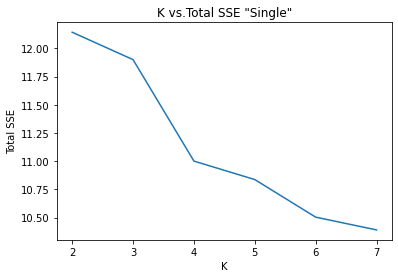

In [78]:
#SSE Graph Single link
plt.plot(k,sse)
plt.title("K vs.Total SSE \"Single\"")
plt.xlabel("K")
plt.ylabel("Total SSE")
plt.show()

In [79]:
# Iris Classification using complete-link
k = [2,3,4,5,6,7]
sse=[]
for num in k:
    print("<",num," Clusters>")
    hac_iris = HACClustering(k=num,link_type="complete")
    hac_iris = hac_iris.fit(iris_no_out)
    hac_iris.print_clusters()
    sse.append(hac_iris.total_sse)

< 2  Clusters>
2
25.7462

[0.3436,0.4318,0.367 ,0.3452]
116
24.1422

[0.719 ,0.4645,0.8106,0.8419]
34
1.6041

< 3  Clusters>
3
7.1537

[0.1961,0.5908,0.0786,0.06  ]
50
1.8450

[0.4554,0.3112,0.5855,0.5612]
66
3.7046

[0.719 ,0.4645,0.8106,0.8419]
34
1.6041

< 4  Clusters>
4
6.2517

[0.2424,0.6742,0.0827,0.0732]
33
0.7438

[0.1062,0.4289,0.0708,0.0343]
17
0.1991

[0.4554,0.3112,0.5855,0.5612]
66
3.7046

[0.719 ,0.4645,0.8106,0.8419]
34
1.6041

< 5  Clusters>
5
4.7586

[0.2424,0.6742,0.0827,0.0732]
33
0.7438

[0.1062,0.4289,0.0708,0.0343]
17
0.1991

[0.5368,0.3671,0.6432,0.6295]
37
1.2271

[0.3515,0.2399,0.512 ,0.4741]
29
0.9845

[0.719 ,0.4645,0.8106,0.8419]
34
1.6041

< 6  Clusters>
6
4.1143

[0.2424,0.6742,0.0827,0.0732]
33
0.7438

[0.1062,0.4289,0.0708,0.0343]
17
0.1991

[0.5368,0.3671,0.6432,0.6295]
37
1.2271

[0.3515,0.2399,0.512 ,0.4741]
29
0.9845

[0.6365,0.4601,0.7657,0.8569]
23
0.4522

[0.8914,0.4735,0.9045,0.8106]
11
0.5076

< 7  Clusters>
7
3.6657

[0.2424,0.6742,0.0827,0.073

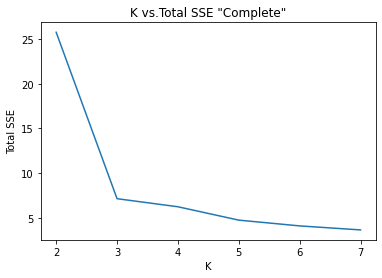

In [80]:
#SSE Graph Complete link
plt.plot(k,sse)
plt.title("K vs.Total SSE \"Complete\"")
plt.xlabel("K")
plt.ylabel("Total SSE")
plt.show()

Discuss differences between single-link and complete-link

I used normalization for the iris data.
For both of the methods, the toal SSE went down when there were more clusters made. When I look at the value of the total SSE, however, there was a significant difference between the two graphs. The lowest total SSE was about 10 for the single method, but it was less than 5 for the complete link method.

## 2.1.2 (5%) Clustering the Iris Classification problem - HAC

Requirements:
- Repeat excercise 2.1.1 and include the output label as one of the input features.

In [81]:
from sklearn import preprocessing

# Clustering Labels using single-link
iris = arff.loadarff("iris.arff")
iris_df = pd.DataFrame(iris[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')
col = iris_df['class']
iris_df = iris_df.drop(columns=['class'])

# Normalize
iris_df = (iris_df_noout - iris_df_noout.min()) / (iris_df_noout.max() - iris_df_noout.min())
iris_df['class'] = col
le = preprocessing.LabelEncoder()
iris_df['class'] = le.fit_transform(iris_df['class'])
iris_np = np.array(iris_df)

k = [2,3,4,5,6,7]
sse=[]
for num in k:
    print("<",num," Clusters>")
    hac_iris = HACClustering(k=num,link_type="single")
    hac_iris = hac_iris.fit(iris_np)
    hac_iris.print_clusters()
    sse.append(hac_iris.total_sse)

< 2  Clusters>
2
37.1437

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

[0.545 ,0.3633,0.662 ,0.6567,1.5   ]
100
35.2987

< 3  Clusters>
3
7.8175

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6356,0.4058,0.7715,0.8025,2.    ]
50
3.4840

< 4  Clusters>
4
7.5020

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6451,0.4099,0.7752,0.8053,2.    ]
49
3.1686

[0.1667,0.2083,0.5932,0.6667,2.    ]
1
0.0000

< 5  Clusters>
5
7.2591

[0.199 ,0.6003,0.0792,0.0595,0.    ]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833,0.    ]
1
0.0000

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6451,0.4099,0.7752,0.8053,2.    ]
49
3.1686

[0.1667,0.2083,0.5932,0.6667,2.    ]
1
0.0000

< 6  Clusters>
6
6.7360

[0.199 ,0.6003,0.0792,0.0595,0.    ]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833,0.    ]
1
0.0000

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6312,0.3954,0.7681,0.8041,2.    ]
47
2.6392

[0.1667,0.20

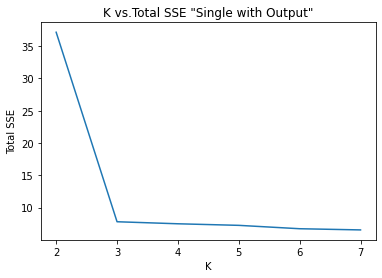

In [82]:
#SSE Graph single link
plt.plot(k,sse)
plt.title("K vs.Total SSE \"Single with Output\"")
plt.xlabel("K")
plt.ylabel("Total SSE")
plt.show()

In [83]:
# Clustering Labels using complete-link
k = [2,3,4,5,6,7]
sse=[]
for num in k:
    print("<",num," Clusters>")
    hac_iris = HACClustering(k=num,link_type="complete")
    hac_iris = hac_iris.fit(iris_np)
    hac_iris.print_clusters()
    sse.append(hac_iris.total_sse)

< 2  Clusters>
2
47.0041

[0.3253,0.4558,0.3156,0.2854,0.5   ]
100
43.5201

[0.6356,0.4058,0.7715,0.8025,2.    ]
50
3.4840

< 3  Clusters>
3
7.8175

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6356,0.4058,0.7715,0.8025,2.    ]
50
3.4840

< 4  Clusters>
4
6.3417

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.7343,0.4708,0.8192,0.8611,2.    ]
30
1.4031

[0.4875,0.3083,0.7   ,0.7146,2.    ]
20
0.6051

< 5  Clusters>
5
5.4397

[0.2424,0.6742,0.0827,0.0732,0.    ]
33
0.7438

[0.1062,0.4289,0.0708,0.0343,0.    ]
17
0.1991

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.7343,0.4708,0.8192,0.8611,2.    ]
30
1.4031

[0.4875,0.3083,0.7   ,0.7146,2.    ]
20
0.6051

< 6  Clusters>
6
4.3133

[0.2424,0.6742,0.0827,0.0732,0.    ]
33
0.7438

[0.1062,0.4289,0.0708,0.0343,0.    ]
17
0.1991

[0.578 ,0.4226,0.6045,0.5635,1.    ]
21
0.3918

[0.3649,0.2471,0.5149,0.4727,1.    ]
29
0.9703

[0.7343,

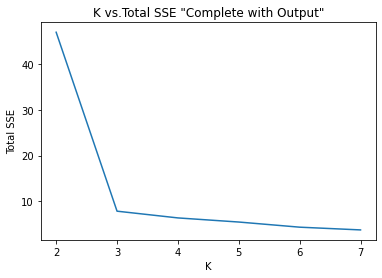

In [84]:
#SSE Graph complete link
plt.plot(k,sse)
plt.title("K vs.Total SSE \"Complete with Output\"")
plt.xlabel("K")
plt.ylabel("Total SSE")
plt.show()

Discuss any differences between the results from 2.1.1 and 2.1.2.

I used the label encoder to include the ouput label as one of the features in the data. When I did this exercise without using the output label, the values of the total SSE was different between the single link and the complete link method. The complete link method had lower total SSE. However, the results showed that the values of the total SSE and the overall graphs were pretty similar between the single link and the complete link.

## 2.2.1 (7.5%) Clustering the Iris Classification problem: K-Means

Load the Iris Dataset [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)

Run K-Means on the Iris dataset using the output label as a feature and without using the output label as a feature

Requirements:
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the total SSE for each k and discuss your results (i.e. what kind of clusters are being made).
---

In [85]:
# Iris Classification without output label
iris = arff.loadarff("iris.arff")
iris_df = pd.DataFrame(iris[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')
iris_df_noout = iris_df.drop(columns=['class'])

# Normalize
iris_df_noout = (iris_df_noout - iris_df_noout.min()) / (iris_df_noout.max() - iris_df_noout.min())
iris_no_out = np.array(iris_df_noout)



k = [2,3,4,5,6,7]
sse=[]
for num in k:
    print("<",num," Clusters>")
    km_iris = KMEANSClustering(k=num,debug=True)
    km_iris = km_iris.fit(iris_no_out)
    km_iris.print_clusters()
    sse.append(km_iris.total_sse)

< 2  Clusters>
2
12.1437

[0.545 ,0.3633,0.662 ,0.6567]
100
10.2987

[0.1961,0.5908,0.0786,0.06  ]
50
1.8450

< 3  Clusters>
3
6.9981

[0.7073,0.4509,0.797 ,0.8248]
39
2.0733

[0.4413,0.3074,0.5757,0.5492]
61
3.0798

[0.1961,0.5908,0.0786,0.06  ]
50
1.8450

< 4  Clusters>
4
6.0372

[0.7073,0.4509,0.797 ,0.8248]
39
2.0733

[0.4413,0.3074,0.5757,0.5492]
61
3.0798

[0.2589,0.6949,0.0823,0.0774]
28
0.5875

[0.1162,0.4583,0.074 ,0.0379]
22
0.2966

< 5  Clusters>
5
5.8553

[0.6716,0.4404,0.7604,0.7851]
51
3.0459

[0.4133,0.2832,0.5597,0.523 ]
49
2.2435

[0.2069,0.5958,0.0788,0.0708]
20
0.1789

[0.1062,0.4289,0.0708,0.0343]
17
0.1991

[0.297 ,0.7949,0.0887,0.0769]
13
0.1878

< 6  Clusters>
6
5.7758

[0.2257,0.6146,0.0773,0.0807]
16
0.1327

[0.412 ,0.2769,0.559 ,0.5208]
48
2.1362

[0.1358,0.4861,0.08  ,0.037 ]
18
0.1129

[0.0278,0.3333,0.0466,0.0417]
4
0.0654

[0.3032,0.8021,0.089 ,0.0729]
12
0.1711

[0.6677,0.4431,0.7572,0.7821]
52
3.1575

< 7  Clusters>
7
5.7179

[0.2326,0.6068,0.0816,0.0807

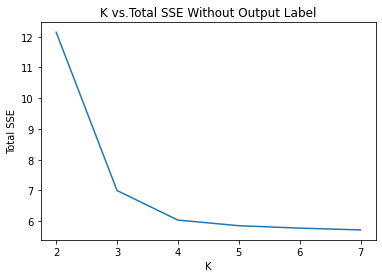

In [86]:
#SSE Graph KMEANS
plt.plot(k,sse)
plt.title("K vs.Total SSE Without Output Label")
plt.xlabel("K")
plt.ylabel("Total SSE")
plt.show()

In [87]:
# Iris Classification with output label
iris = arff.loadarff("iris.arff")
iris_df = pd.DataFrame(iris[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')
col = iris_df['class']
iris_df = iris_df.drop(columns=['class'])

# Normalize
iris_df = (iris_df_noout - iris_df_noout.min()) / (iris_df_noout.max() - iris_df_noout.min())
iris_df['class'] = col
le = preprocessing.LabelEncoder()
iris_df['class'] = le.fit_transform(iris_df['class'])
iris_np = np.array(iris_df)

k = [2,3,4,5,6,7]
sse=[]
for num in k:
    print("<",num," Clusters>")
    km_iris = KMEANSClustering(k=num,debug=True)
    km_iris = km_iris.fit(iris_np)
    km_iris.print_clusters()
    sse.append(km_iris.total_sse)

< 2  Clusters>
2
37.1437

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

[0.545 ,0.3633,0.662 ,0.6567,1.5   ]
100
35.2987

< 3  Clusters>
3
7.8175

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6356,0.4058,0.7715,0.8025,2.    ]
50
3.4840

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50
1.8450

< 4  Clusters>
4
6.8565

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.6356,0.4058,0.7715,0.8025,2.    ]
50
3.4840

[0.2589,0.6949,0.0823,0.0774,0.    ]
28
0.5875

[0.1162,0.4583,0.074 ,0.0379,0.    ]
22
0.2966

< 5  Clusters>
5
6.5384

[0.6356,0.4058,0.7715,0.8025,2.    ]
50
3.4840

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.2069,0.5958,0.0788,0.0708,0.    ]
20
0.1789

[0.1062,0.4289,0.0708,0.0343,0.    ]
17
0.1991

[0.297 ,0.7949,0.0887,0.0769,0.    ]
13
0.1878

< 6  Clusters>
6
6.4546

[0.2257,0.6146,0.0773,0.0807,0.    ]
16
0.1327

[0.4544,0.3208,0.5525,0.5108,1.    ]
50
2.4885

[0.1358,0.4861,0.08  ,0.037 ,0.    ]
18
0.1129

[0.0278,0.3333,0.0466,0.0417,0.    ]
4
0.0654

[0.3032,0

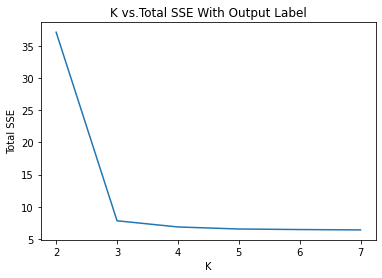

In [88]:
#SSE Graph KMEANS
plt.plot(k,sse)
plt.title("K vs.Total SSE With Output Label")
plt.xlabel("K")
plt.ylabel("Total SSE")
plt.show()

Compare results and differences between using the output label and excluding the output label

I used the normalized data. When the output label was included, the total SSE was very high for k=2, but it went down really fast and it had the lower SSE than the other model when k is higher.

## 2.2.2 (5%) Clustering the Iris Classification problem: K-Means

Requirements:
- Use the output label as an input feature
- Run K-Means 5 times with k=4, each time with different initial random centroids and discuss any variations in the results. 

In [89]:
#K-Means 5 times
sse=[]
for num in range(5):
    print("<4 Clusters>")
    km_iris = KMEANSClustering(k=4,debug=False)
    km_iris = km_iris.fit(iris_np)
    #km_iris.print_clusters()
    sse.append(km_iris.get_total_sse())
sse

<4 Clusters>
[11 16 65 93]
<4 Clusters>
[87 62 77 49]
<4 Clusters>
[107  91  80  88]
<4 Clusters>
[131  20  74  16]
<4 Clusters>
[  8 119 103  23]


[6.888031650106695,
 6.613823274690357,
 6.856549502288229,
 6.8880316501066945,
 6.856549502288228]

Discuss any variations in the results

Since Debug argument is False, the model randomly chooses intial centroids. I ran the above code several times and it seems it's working pretty consistently. Sometimes, however, it shows very high SSE value of the model.

## 3.1 (12.5%) Run the SK versions of HAC (both single and complete link) on iris including the output label and compare your results with those above.
Use the silhouette score for this iris problem(k = 2-7).  You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function from [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and compare the results. State which metric was used. 
- Possible sklean metrics include (* metrics require ground truth labels):
    - adjusted_mutual_info_score*
    - adjusted_rand_score*
    - homogeneity_score*
    - completeness_score*
    - fowlkes_mallows_score*
    - calinski_harabasz_score
    - davies_bouldin_score
- Experiment using different hyper-parameters. Discuss Results

In [90]:
# Load sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import completeness_score
from sklearn import datasets

iris = datasets.load_iris()

print("HAC-single")
for k in range(2,8):
    
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    preds = cluster.fit_predict(iris_np)
    score = silhouette_score(iris_np, preds)
    ad_score = adjusted_rand_score(iris_np[:,-1], preds)
    print("k = ",k, "silhouette_score = ", score, "adjusted_rand_score = ", ad_score)

print("\nHAC-complete")
for k in range(2,8):
    
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    preds = cluster.fit_predict(iris_np)
    score = silhouette_score(iris_np, preds)
    ad_score = adjusted_rand_score(iris_np[:,-1], preds)
    print("k = ",k, "silhouette_score = ", score, "adjusted_rand_score = ", ad_score)

#print(cluster.labels_)

# hac_iris = HACClustering(k=2,link_type="single")
# hac_iris = hac_iris.fit(iris_no_out)
# print(hac_iris.clusters_arr)


HAC-single
k =  2 silhouette_score =  0.6634934853276364 adjusted_rand_score =  0.5681159420289855
k =  3 silhouette_score =  0.7535756007166511 adjusted_rand_score =  1.0
k =  4 silhouette_score =  0.6409128262751564 adjusted_rand_score =  0.9900327781122483
k =  5 silhouette_score =  0.5380190935941263 adjusted_rand_score =  0.9799973150758491
k =  6 silhouette_score =  0.5002771282368195 adjusted_rand_score =  0.960552007148294
k =  7 silhouette_score =  0.47595099504847277 adjusted_rand_score =  0.9509422268704123

HAC-complete
k =  2 silhouette_score =  0.5904668929234176 adjusted_rand_score =  0.5681159420289855
k =  3 silhouette_score =  0.7535756007166511 adjusted_rand_score =  1.0
k =  4 silhouette_score =  0.6306901192137707 adjusted_rand_score =  0.873083475298126
k =  5 silhouette_score =  0.49334635141188643 adjusted_rand_score =  0.7440192130975792
k =  6 silhouette_score =  0.3680200911831923 adjusted_rand_score =  0.5909450467637616
k =  7 silhouette_score =  0.36378703

*Record impressions*
For both single and complete method, the silhouette score and the adjusted_rand_score were the highest when k is 3. This makes sense because there are three output classes in the iris dataset. I used sklearn's adjusted_rand_score which computes a similarity measure between clusterings by considering all pairs of samples.

## 3.2 (12.5%) Run the SK version of k-means on iris including the output label and compare your results with those above. 

Use the silhouette score for this iris problem(k = 2-7). You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function form sklearn.metrics and compare the results. State which metric was used
- Experiment different hyper-parameters. Discuss Results

In [91]:
# Load sklearn 
print("\nKMeans")
for k in range(2,8):
    
    cluster = KMeans(n_clusters=k, random_state=1)
    preds = cluster.fit_predict(iris_np)
    score = silhouette_score(iris_np, preds)
    cp_score = completeness_score(iris_np[:,-1], preds)
    print("k = ",k, "silhouette_score = ", score, "completeness_score = ", cp_score)



KMeans
k =  2 silhouette_score =  0.6634934853276364 completeness_score =  0.9999999999999997
k =  3 silhouette_score =  0.7535756007166511 completeness_score =  1.0
k =  4 silhouette_score =  0.6341243646428792 completeness_score =  0.8268987123315644
k =  5 silhouette_score =  0.5141510701022861 completeness_score =  0.7045205162757067
k =  6 silhouette_score =  0.3807148367375177 completeness_score =  0.6136956483110737
k =  7 silhouette_score =  0.3800844026619606 completeness_score =  0.5764987262905837


*Record impressions*
For K means, the silhouette score was 0.75 when k=3 and it was the highest score. For the other metric, the result was the same. I used sklearns' completeness score which measure a completeness metric of a cluster labeling given a ground truth. The completeness is satisfied if all the data points that are members of a given class are elements of the same cluster.

## 4. (Optional 5% extra credit) For your silhouette experiment above, write and use your own code to calculate the silhouette scores, rather than the SK or other version. 


*Show findings here*

In [ ]:
# Copy function Below